NAME : KELVIN CHRISTOBER

ROLL NO : 215229120

# First import library and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
X = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
X

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
X["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [5]:
X["location"].value_counts()

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
Sevier County.                    1
UK & Ibiza                        1
6                                 1
Salt Lake City, Utah              1
wherever-the-fuck washington      1
Name: location, Length: 3341, dtype: int64

In [6]:
X["keyword"].isna().sum()

61

In [7]:
X["location"].isna().sum()

2533

In [18]:
# Keyword, Location correlation with target

In [8]:
k_encoder = LabelEncoder()
X["keyword"] = k_encoder.fit_transform(X["keyword"])

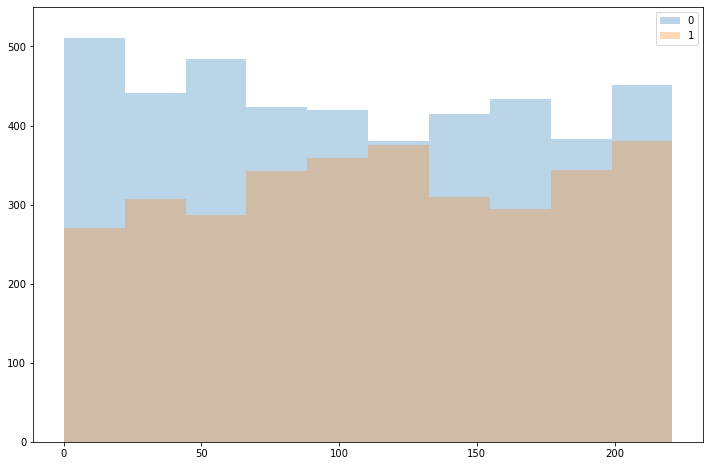

In [28]:
plt.figure(figsize=(12,8))
plt.ylim(0, 550)
plt.hist(X["keyword"][X["target"]==0], alpha=0.3, label="0")
plt.hist(X["keyword"][X["target"]==1], alpha=0.3, label="1")
plt.legend()
plt.show()

In [10]:
l_encoder = LabelEncoder()
X["location"] = l_encoder.fit_transform(X["location"])

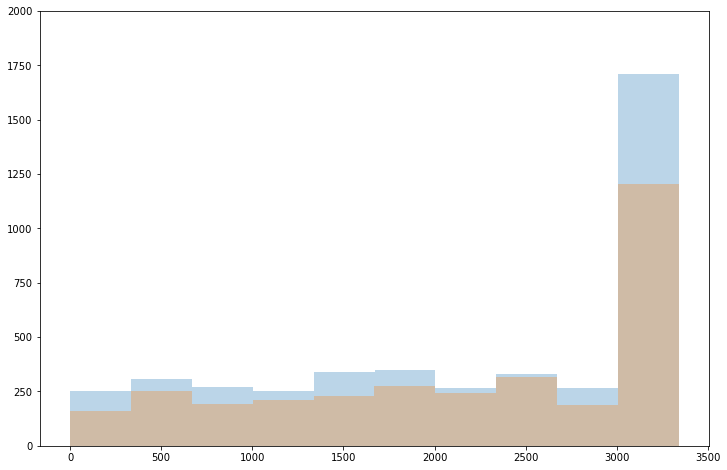

In [20]:
plt.figure(figsize=(12,8))
plt.ylim(0, 2000)
plt.hist(X["location"][X["target"]==0], alpha=0.3, label="0")
plt.hist(X["location"][X["target"]==1], alpha=0.3, label="1")
plt.show()

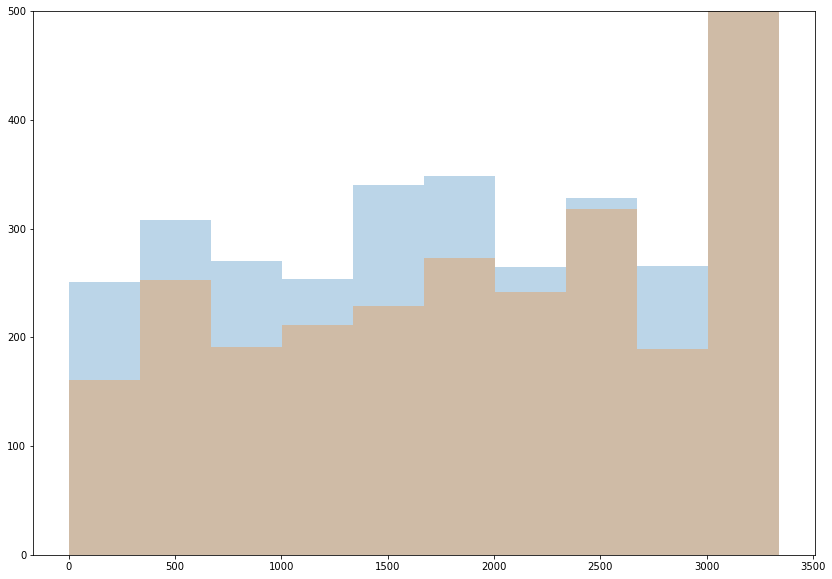

In [12]:
plt.figure(figsize=(14, 10))
plt.ylim(0, 500)
plt.hist(X["location"][X["target"]==0], alpha=0.3, label="0")
plt.hist(X["location"][X["target"]==1], alpha=0.3, label="1")
plt.show()

In [ ]:
# Make and Train model 

In [13]:
model = RandomForestClassifier()
model.fit(X[["keyword", "location"]], X["target"])

RandomForestClassifier()

In [14]:
model.feature_importances_

array([0.53688916, 0.46311084])

In [15]:
i=0
for i in range(len(X_test["location"])):
    if X_test["location"][i] in l_encoder.classes_:
        pass
    else:
        X_test["location"][i] = np.nan

<ipython-input-15-705d71a7120f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["location"][i] = np.nan


In [16]:
X_test["keyword"] = k_encoder.transform(X_test["keyword"])
X_test["location"] = l_encoder.transform(X_test["location"])

# Save submission

In [24]:
sample_submission = pd.read_csv("sample_submission.csv")

In [25]:
sample_submission["target"] = model.predict(X_test[["keyword", "location"]])

In [26]:
sample_submission.to_csv("submission.csv", index=None)